In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Student Table

In [2]:
studentdf = pd.read_csv('raw-csv-files/student.csv')
studentdf

,ID,Name,Email
0,1,John Doe,john.doe@example.com
1,2,Jane Doe,jane.doe@example.com
2,3,Mary Smith,mary.smith@example.com
3,4,Peter Jones,peter.jones@example.com
4,5,Susan Brown,susan.brown@example.com
5,6,David Williams,david.williams@example.com
6,7,Emily Johnson,emily.johnson@example.com
7,8,Michael Garcia,michael.garcia@example.com
8,9,Jessica Rodriguez,jessica.rodriguez@example.com
9,10,Christopher Gonzalez,christopher.gonzalez@example.com


Dropping email column and making ID the index.

In [3]:
studentdf = studentdf.drop(columns='Email')
studentdf = studentdf.set_index('ID')
studentdf

,Name
ID,
1,John Doe
2,Jane Doe
3,Mary Smith
4,Peter Jones
5,Susan Brown
6,David Williams
7,Emily Johnson
8,Michael Garcia
9,Jessica Rodriguez


# Teacher Table

In [4]:
teacherdf = pd.read_csv('raw-csv-files/teacher.csv')
teacherdf

,ID,Name,Email
0,1,Sarah Hanks,sarah.hanks@example.com
1,2,Michael Jones,michael.jones@example.com
2,3,David Green,david.green@example.com
3,4,Sarah Williams,sarah.williams@example.com
4,5,Peter Johnson,peter.johnson@example.com
5,6,Mary Green,mary.green@example.com
6,7,James Anderson,james.anderson@example.com
7,8,Emily Brown,emily.brown@example.com
8,9,Thomas Green,thomas.green@example.com
9,10,Jessica Williams,jessica.williams@example.com


Dropping email column and making ID the index.

In [5]:
teacherdf = teacherdf.drop(columns='Email')
teacherdf = teacherdf.set_index('ID')
teacherdf

,Name
ID,
1,Sarah Hanks
2,Michael Jones
3,David Green
4,Sarah Williams
5,Peter Johnson
6,Mary Green
7,James Anderson
8,Emily Brown
9,Thomas Green


# Course Table

In [6]:
coursedf = pd.read_csv('raw-csv-files/course.csv')
coursedf

,ID,Name,Subject,Teacher_Id
0,1,Math 101,Math,1
1,2,English 101,English,2
2,3,Science 101,Science,3
3,4,History 101,History,4
4,5,Computer Science 101,Computer Science,5
5,6,Spanish 101,Spanish,6
6,7,French 101,French,7
7,8,German 101,German,8
8,9,Art 101,Art,9
9,10,Music 101,Music,10


Making ID the index.

In [7]:
coursedf = coursedf.set_index('ID')
coursedf

,Name,Subject,Teacher_Id
ID,,,
1,Math 101,Math,1
2,English 101,English,2
3,Science 101,Science,3
4,History 101,History,4
5,Computer Science 101,Computer Science,5
6,Spanish 101,Spanish,6
7,French 101,French,7
8,German 101,German,8
9,Art 101,Art,9


# Administrator Table

In [8]:
admindf = pd.read_csv('raw-csv-files/admin.csv')
admindf

,ID,Name,Email
0,1,Noah Johnson,noah.johnson@example.com
1,2,Amelia Brown,amelia.brown@example.com
2,3,Benjamin Green,benjamin.green@example.com
3,4,Charlotte Jones,charlotte.jones@example.com
4,5,Daniel Campbell,daniel.campbell@example.com
5,6,Abigail Jones,abigail.jones@example.com
6,7,Benjamin Brown,benjamin.brown@example.com
7,8,Caroline Moore,caroline.moore@example.com
8,9,Daniel Sander,daniel.sander@example.com
9,10,Emily Davis,emily.davis@example.com


Dropping email column and making ID the index.

In [9]:
admindf = admindf.drop(columns='Email')
admindf = admindf.set_index('ID')
admindf

,Name
ID,
1,Noah Johnson
2,Amelia Brown
3,Benjamin Green
4,Charlotte Jones
5,Daniel Campbell
6,Abigail Jones
7,Benjamin Brown
8,Caroline Moore
9,Daniel Sander


# Grades Table

In [10]:
gradesdf = pd.read_csv('raw-csv-files/grade.csv')
gradesdf

,Grade ID,Student ID,Course ID,Grade
0,1,1,1,90
1,2,1,2,80
2,3,3,3,70
3,4,6,4,60
4,5,2,5,74
5,6,4,6,40
6,7,5,7,30
7,8,5,8,20
8,9,2,9,10
9,10,2,10,26


Rename 'Grade ID' column to just 'ID' and make ID the index

In [11]:
gradesdf.rename(columns={'Grade ID': 'ID'}, inplace=True)
gradesdf = gradesdf.set_index('ID')
gradesdf

,Student ID,Course ID,Grade
ID,,,
1,1,1,90
2,1,2,80
3,3,3,70
4,6,4,60
5,2,5,74
6,4,6,40
7,5,7,30
8,5,8,20
9,2,9,10


# Load to CSV

Pushing clean datasets to their respective csv files

In [12]:
admindf.to_csv('clean-csv-files/admindf_clean.csv')
coursedf.to_csv('clean-csv-files/coursedf_clean.csv') 
gradesdf.to_csv('clean-csv-files/gradesdf_clean.csv') 
studentdf.to_csv('clean-csv-files/studentdf_clean.csv') 
teacherdf.to_csv('clean-csv-files/teacherdf_clean.csv') 

In [13]:
gradesdf.head()

,Student ID,Course ID,Grade
ID,,,
1,1,1,90
2,1,2,80
3,3,3,70
4,6,4,60
5,2,5,74


# Visualizations

Average Grade across all Courses: 71.28


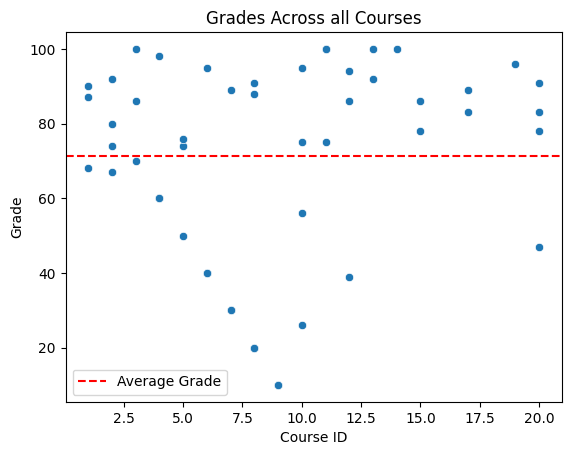

In [14]:
avg_grade = gradesdf['Grade'].mean()
sns.scatterplot(data=gradesdf, x="Course ID", y="Grade")
plt.axhline(y=avg_grade, color='red', linestyle='--', label='Average Grade')
plt.title('Grades Across all Courses')
print("Average Grade across all Courses:", avg_grade)
plt.legend(loc= 'lower left')

<Figure size 2000x500 with 0 Axes>

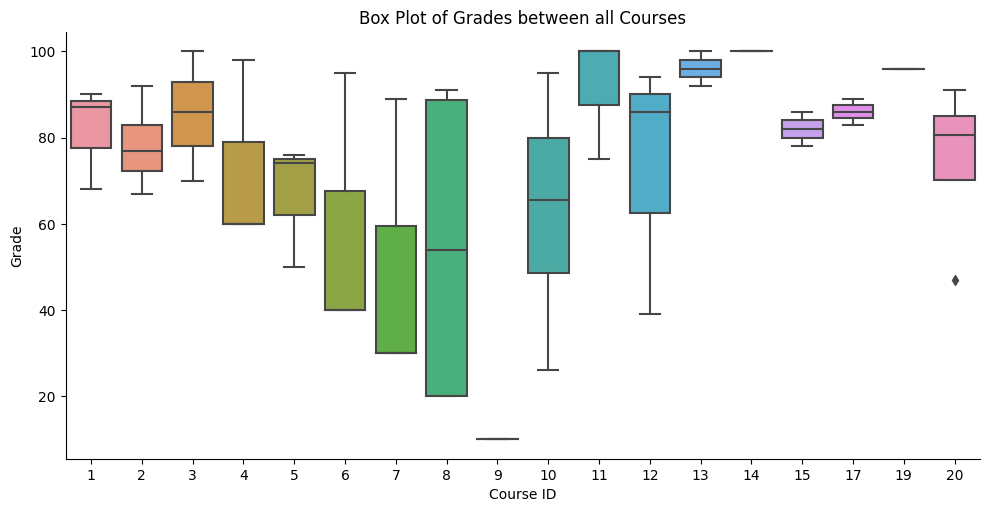

In [15]:
plt.figure(figsize=(20,5))
sns.catplot(data=gradesdf, x="Course ID", y="Grade", kind="box", height=5, aspect=2)

plt.title('Box Plot of Grades between all Courses')
plt.xlabel('Course ID')
plt.ylabel('Grade')
plt.show()

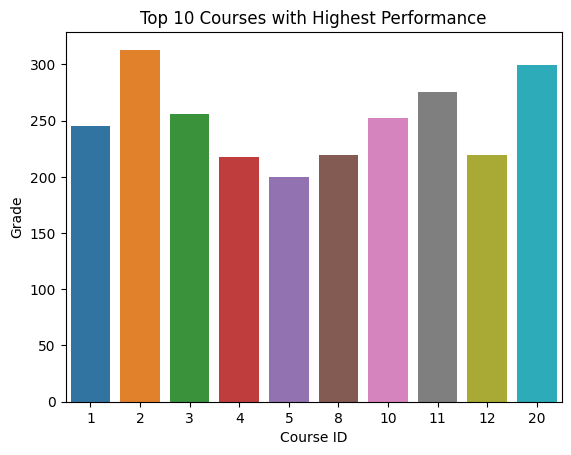

In [16]:
top_10 = gradesdf.groupby('Course ID')['Grade'].sum().nlargest(10)
sns.barplot(x = top_10.index, y = top_10.values)
plt.title('Top 10 Courses with Highest Performance')
plt.xlabel('Course ID')
plt.ylabel('Grade')
plt.show()

Course ID 1: Math 101
Course ID 2: English 101
Course ID 3: Science 101
Course ID 4: History 101
Course ID 5: Computer Science 101
Course ID 8: German 101
Course ID 10: Music 101
Course ID 11: P.E
Course ID 12: Health 101
Course ID 20: Journalism 101